<a href="https://colab.research.google.com/github/Harini-01/Cropspect/blob/main/Crop_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harini02
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images


100%|██████████| 2.34G/2.34G [02:17<00:00, 18.2MB/s]


In [3]:
!pwd

/content


In [4]:
ls

20k-multi-class-crop-disease-images/  sample_data/


In [5]:
cd 20k-multi-class-crop-disease-images

/content/20k-multi-class-crop-disease-images


In [6]:
ls

Train/  Validation/


In [7]:
cd Train

/content/20k-multi-class-crop-disease-images/Train


In [8]:
ls

'American Bollworm on Cotton'/  'Healthy cotton'/           'Sugarcane Healthy'/
'Anthracnose on Cotton'/        'Healthy Maize'/            'thirps on  cotton'/
'Army worm'/                    'Healthy Wheat'/             Tungro/
'bacterial_blight in Cotton'/   'Leaf Curl'/                'Wheat aphid'/
'Becterial Blight in Rice'/     'Leaf smut'/                'Wheat black rust'/
'bollrot on Cotton'/            'maize ear rot'/            'Wheat Brown leaf Rust'/
'bollworm on Cotton'/           'maize fall armyworm'/      'Wheat leaf blight'/
 Brownspot/                     'maize stem borer'/         'Wheat mite'/
 Common_Rust/                   'Mosaic sugarcane'/         'Wheat powdery mildew'/
'Cotton Aphid'/                 'pink bollworm in cotton'/  'Wheat scab'/
'cotton mealy bug'/             'red cotton bug'/           'Wheat Stem fly'/
'cotton whitefly'/              'RedRot sugarcane'/          Wheat___Yellow_Rust/
'Flag Smut'/                    'RedRust sugarcane'/    

In [9]:
#Add weather labels to all images
import csv
import os

# Define the data
data = [
    ["American Bollworm on Cotton",28.5,65,75],
["American Bollworm on Cotton",27.3,68,80],
["American Bollworm on Cotton",29.1,64,85],
["American Bollworm on Cotton",26.7,66,78],
["American Bollworm on Cotton",28.0,63,72],
["American Bollworm on Cotton",30.2,69,90],
["American Bollworm on Cotton",25.9,67,70],
["American Bollworm on Cotton",31.0,60,100],
["American Bollworm on Cotton",27.8,62,85],
["American Bollworm on Cotton",29.5,65,88],
["bollworm on Cotton",28.0,66,75],
["bollworm on Cotton",26.4,68,70],
["bollworm on Cotton",29.3,63,90],
["bollworm on Cotton",25.7,65,65],
["bollworm on Cotton",31.2,64,95],
["bollworm on Cotton",27.1,67,80],
["bollworm on Cotton",29.8,62,88],
["bollworm on Cotton",26.9,69,72],
["bollworm on Cotton",30.5,60,98],
["bollworm on Cotton",28.3,61,78],
["pink bollworm in cotton",27.5,68,75],
["pink bollworm in cotton",25.8,70,85],
["pink bollworm in cotton",29.0,66,90],
["pink bollworm in cotton",26.2,65,78],
["pink bollworm in cotton",30.1,63,95],
["pink bollworm in cotton",27.9,61,70],
["pink bollworm in cotton",28.7,69,88],
["pink bollworm in cotton",25.6,64,72],
["pink bollworm in cotton",31.0,62,100],
["pink bollworm in cotton",29.4,67,85],


["bacterial_blight in Cotton", 30.5, 72, 110],
["bacterial_blight in Cotton", 31.2, 75, 130],
["bacterial_blight in Cotton", 32.8, 78, 140],
["bacterial_blight in Cotton", 29.4, 73, 120],
["bacterial_blight in Cotton", 34.1, 76, 150],
["bacterial_blight in Cotton", 33.3, 70, 125],
["bacterial_blight in Cotton", 30.9, 74, 135],
["bacterial_blight in Cotton", 31.5, 77, 145],
["bacterial_blight in Cotton", 32.0, 72, 115],
["bacterial_blight in Cotton", 28.7, 79, 100],
["red cotton bug", 30.1, 71, 105],
["red cotton bug", 31.4, 74, 125],
["red cotton bug", 32.2, 77, 140],
["red cotton bug", 29.9, 72, 115],
["red cotton bug", 33.5, 78, 150],
["red cotton bug", 30.8, 73, 130],
["red cotton bug", 32.0, 75, 120],
["red cotton bug", 31.7, 70, 135],
["red cotton bug", 29.5, 79, 140],
["red cotton bug", 33.1, 76, 125],
["cotton mealy bug", 31.2, 72, 120],
["cotton mealy bug", 32.0, 75, 135],
["cotton mealy bug", 30.8, 78, 140],
["cotton mealy bug", 29.7, 70, 110],
["cotton mealy bug", 34.5, 76, 150],
["cotton mealy bug", 32.5, 74, 130],
["cotton mealy bug", 31.8, 71, 125],
["cotton mealy bug", 30.3, 77, 145],
["cotton mealy bug", 33.2, 79, 140],
["cotton mealy bug", 28.9, 73, 100],


["Anthracnose on Cotton", 26.5, 72, 155],
["Anthracnose on Cotton", 28.7, 78, 165],
["Anthracnose on Cotton", 27.9, 80, 170],
["Anthracnose on Cotton", 29.1, 75, 160],
["Anthracnose on Cotton", 25.8, 82, 180],
["Anthracnose on Cotton", 27.4, 85, 190],
["Anthracnose on Cotton", 28.2, 77, 175],
["Anthracnose on Cotton", 26.9, 79, 185],
["Anthracnose on Cotton", 30.0, 70, 150],
["Anthracnose on Cotton", 25.5, 88, 200],
["bollrot on Cotton", 28.4, 74, 155],
["bollrot on Cotton", 29.7, 80, 165],
["bollrot on Cotton", 27.2, 83, 175],
["bollrot on Cotton", 25.6, 87, 185],
["bollrot on Cotton", 30.1, 76, 160],
["bollrot on Cotton", 26.8, 89, 195],
["bollrot on Cotton", 27.9, 82, 170],
["bollrot on Cotton", 28.3, 78, 180],
["bollrot on Cotton", 29.0, 81, 190],
["bollrot on Cotton", 25.7, 86, 200],


["Leaf Curl", 26.1, 68, 55],
["Leaf Curl", 27.4, 72, 60],
["Leaf Curl", 25.8, 75, 65],
["Leaf Curl", 29.0, 70, 50],
["Leaf Curl", 28.3, 63, 80],
["Leaf Curl", 26.5, 77, 70],
["Leaf Curl", 27.9, 71, 60],
["Leaf Curl", 28.0, 65, 75],
["Leaf Curl", 25.6, 78, 85],
["Leaf Curl", 29.2, 66, 55],

["Cotton Aphid", 27.0, 62, 55],
["Cotton Aphid", 25.5, 70, 60],
["Cotton Aphid", 28.4, 75, 65],
["Cotton Aphid", 29.1, 68, 50],
["Cotton Aphid", 26.7, 78, 70],
["Cotton Aphid", 27.2, 64, 55],
["Cotton Aphid", 25.9, 76, 60],
["Cotton Aphid", 28.0, 67, 50],
["Cotton Aphid", 29.3, 72, 75],
["Cotton Aphid", 26.4, 69, 85],

["cotton whitefly", 25.8, 74, 65],
["cotton whitefly", 27.3, 67, 50],
["cotton whitefly", 26.9, 72, 55],
["cotton whitefly", 28.6, 78, 60],
["cotton whitefly", 29.0, 80, 70],
["cotton whitefly", 25.5, 62, 50],
["cotton whitefly", 27.7, 69, 75],
["cotton whitefly", 28.2, 77, 55],
["cotton whitefly", 26.4, 73, 60],
["cotton whitefly", 29.1, 65, 65],


["Becterial Blight in Rice", 27.5, 85, 160],
["Becterial Blight in Rice", 28.0, 87, 175],
["Becterial Blight in Rice", 29.3, 82, 180],
["Becterial Blight in Rice", 26.8, 88, 200],
["Becterial Blight in Rice", 27.2, 84, 190],
["Becterial Blight in Rice", 28.5, 86, 170],
["Becterial Blight in Rice", 29.1, 83, 185],
["Becterial Blight in Rice", 25.9, 89, 220],
["Becterial Blight in Rice", 27.8, 81, 160],
["Becterial Blight in Rice", 28.7, 80, 230],

["Brownspot", 26.1, 82, 180],
["Brownspot", 27.4, 88, 200],
["Brownspot", 28.5, 85, 220],
["Brownspot", 29.0, 87, 250],
["Brownspot", 27.8, 80, 190],
["Brownspot", 26.5, 84, 210],
["Brownspot", 28.2, 83, 230],
["Brownspot", 27.6, 86, 240],
["Brownspot", 29.1, 89, 260],
["Brownspot", 25.9, 81, 170],

["Rice Blast", 25.5, 83, 190],
["Rice Blast", 26.8, 88, 210],
["Rice Blast", 27.9, 85, 230],
["Rice Blast", 28.4, 87, 250],
["Rice Blast", 29.2, 84, 240],
["Rice Blast", 25.6, 90, 260],
["Rice Blast", 27.1, 82, 180],
["Rice Blast", 28.7, 86, 220],
["Rice Blast", 26.4, 89, 250],
["Rice Blast", 29.0, 81, 200],

["Leaf smut", 21.4, 72, 110],
["Leaf smut", 22.8, 78, 130],
["Leaf smut", 23.5, 74, 145],
["Leaf smut", 24.2, 80, 155],
["Leaf smut", 25.6, 73, 160],
["Leaf smut", 26.1, 76, 170],
["Leaf smut", 27.3, 82, 180],
["Leaf smut", 22.0, 77, 140],
["Leaf smut", 23.9, 81, 165],
["Leaf smut", 20.7, 85, 190],

["Wheat aphid", 12.5, 52, 15],
["Wheat aphid", 14.3, 60, 25],
["Wheat aphid", 16.7, 55, 20],
["Wheat aphid", 18.2, 65, 30],
["Wheat aphid", 20.1, 58, 22],
["Wheat aphid", 22.4, 50, 18],
["Wheat aphid", 23.0, 67, 45],
["Wheat aphid", 15.6, 53, 12],
["Wheat aphid", 17.8, 62, 35],
["Wheat aphid", 19.4, 66, 28],

["Wheat black rust", 11.0, 55, 20],
["Wheat black rust", 13.6, 62, 30],
["Wheat black rust", 15.8, 50, 12],
["Wheat black rust", 17.2, 65, 22],
["Wheat black rust", 19.5, 60, 25],
["Wheat black rust", 21.0, 57, 18],
["Wheat black rust", 23.1, 52, 14],
["Wheat black rust", 12.8, 68, 40],
["Wheat black rust", 14.4, 59, 20],
["Wheat black rust", 16.2, 64, 33],

["Wheat Brown leaf Rust", 10.8, 53, 10],
["Wheat Brown leaf Rust", 13.4, 58, 18],
["Wheat Brown leaf Rust", 15.7, 62, 30],
["Wheat Brown leaf Rust", 17.6, 55, 20],
["Wheat Brown leaf Rust", 19.3, 50, 15],
["Wheat Brown leaf Rust", 21.0, 60, 22],
["Wheat Brown leaf Rust", 22.4, 67, 45],
["Wheat Brown leaf Rust", 14.8, 57, 12],
["Wheat Brown leaf Rust", 16.9, 62, 28],
["Wheat Brown leaf Rust", 18.3, 65, 35],

["Wheat___Yellow_Rust", 11.5, 54, 12],
["Wheat___Yellow_Rust", 14.1, 59, 22],
["Wheat___Yellow_Rust", 16.5, 63, 35],
["Wheat___Yellow_Rust", 18.0, 52, 15],
["Wheat___Yellow_Rust", 20.2, 68, 30],
["Wheat___Yellow_Rust", 21.7, 55, 10],
["Wheat___Yellow_Rust", 23.4, 62, 25],
["Wheat___Yellow_Rust", 12.9, 60, 20],
["Wheat___Yellow_Rust", 15.3, 67, 40],
["Wheat___Yellow_Rust", 17.8, 64, 28],

["Wheat leaf blight", 16.5, 62, 55],
["Wheat leaf blight", 18.2, 68, 75],
["Wheat leaf blight", 20.1, 65, 60],
["Wheat leaf blight", 22.3, 70, 85],
["Wheat leaf blight", 19.7, 64, 50],
["Wheat leaf blight", 17.8, 72, 90],
["Wheat leaf blight", 21.0, 67, 80],
["Wheat leaf blight", 16.2, 61, 58],
["Wheat leaf blight", 18.9, 69, 65],
["Wheat leaf blight", 20.5, 63, 72],

["Wheat powdery mildew", 15.2, 60, 53],
["Wheat powdery mildew", 17.5, 65, 80],
["Wheat powdery mildew", 19.3, 68, 70],
["Wheat powdery mildew", 21.4, 72, 95],
["Wheat powdery mildew", 16.9, 64, 55],
["Wheat powdery mildew", 18.6, 70, 77],
["Wheat powdery mildew", 20.3, 67, 85],
["Wheat powdery mildew", 15.7, 62, 50],
["Wheat powdery mildew", 19.0, 66, 60],
["Wheat powdery mildew", 22.1, 63, 90],

["Wheat scab", 15.9, 63, 58],
["Wheat scab", 17.4, 66, 65],
["Wheat scab", 19.2, 71, 88],
["Wheat scab", 21.0, 64, 70],
["Wheat scab", 18.3, 62, 80],
["Wheat scab", 20.7, 69, 95],
["Wheat scab", 22.0, 70, 85],
["Wheat scab", 16.8, 61, 55],
["Wheat scab", 19.5, 68, 78],
["Wheat scab", 21.2, 65, 82],


["Wheat mite", 21.4, 45, 12],
["Wheat mite", 23.7, 50, 8],
["Wheat mite", 25.2, 55, 15],
["Wheat mite", 22.1, 48, 10],
["Wheat mite", 24.3, 52, 5],
["Wheat mite", 26.0, 47, 18],
["Wheat mite", 20.9, 44, 7],
["Wheat mite", 22.8, 49, 13],
["Wheat mite", 24.1, 53, 14],
["Wheat mite", 27.3, 46, 9],

["Wheat stem fly", 22.5, 42, 17],
["Wheat stem fly", 24.0, 55, 12],
["Wheat stem fly", 25.3, 50, 14],
["Wheat stem fly", 23.8, 47, 8],
["Wheat stem fly", 21.6, 46, 16],
["Wheat stem fly", 26.1, 43, 19],
["Wheat stem fly", 20.7, 49, 11],
["Wheat stem fly", 22.9, 54, 10],
["Wheat stem fly", 24.6, 41, 6],
["Wheat stem fly", 27.0, 48, 13],

["maize ear rot", 27.3, 65, 120],
["maize ear rot", 26.8, 72, 135],
["maize ear rot", 28.1, 68, 140],
["maize ear rot", 29.4, 74, 110],
["maize ear rot", 25.7, 63, 130],
["maize ear rot", 27.5, 70, 125],
["maize ear rot", 28.9, 78, 145],
["maize ear rot", 26.3, 67, 115],
["maize ear rot", 29.0, 69, 105],
["maize ear rot", 24.9, 75, 150],

["maize fall armyworm", 28.2, 60, 110],
["maize fall armyworm", 29.5, 77, 125],
["maize fall armyworm", 27.9, 68, 140],
["maize fall armyworm", 26.4, 73, 115],
["maize fall armyworm", 25.8, 64, 130],
["maize fall armyworm", 28.6, 71, 145],
["maize fall armyworm", 29.1, 78, 120],
["maize fall armyworm", 27.2, 66, 135],
["maize fall armyworm", 26.7, 69, 125],
["maize fall armyworm", 24.8, 75, 150],

["maize stem borer", 26.9, 62, 130],
["maize stem borer", 28.4, 70, 140],
["maize stem borer", 29.0, 66, 115],
["maize stem borer", 27.6, 64, 125],
["maize stem borer", 25.3, 68, 135],
["maize stem borer", 28.7, 73, 120],
["maize stem borer", 29.2, 75, 145],
["maize stem borer", 26.1, 67, 110],
["maize stem borer", 27.8, 60, 130],
["maize stem borer", 24.5, 71, 150],

["Common_Rust", 23.5, 72, 120],
["Common_Rust", 24.8, 74, 130],
["Common_Rust", 22.9, 78, 140],
["Common_Rust", 25.1, 80, 150],
["Common_Rust", 21.7, 75, 125],
["Common_Rust", 23.8, 77, 135],
["Common_Rust", 24.2, 70, 115],
["Common_Rust", 22.5, 82, 145],
["Common_Rust", 25.0, 80, 155],
["Common_Rust", 23.3, 73, 140],

["Gray_Leaf_Spot", 26.1, 79, 145],
["Gray_Leaf_Spot", 24.5, 74, 130],
["Gray_Leaf_Spot", 27.0, 81, 155],
["Gray_Leaf_Spot", 25.8, 80, 140],
["Gray_Leaf_Spot", 22.9, 75, 125],
["Gray_Leaf_Spot", 26.5, 82, 150],
["Gray_Leaf_Spot", 24.3, 77, 135],
["Gray_Leaf_Spot", 27.2, 83, 160],
["Gray_Leaf_Spot", 23.8, 70, 120],
["Gray_Leaf_Spot", 25.7, 78, 140],

["RedRot sugarcane", 22.5, 75, 160],
["RedRot sugarcane", 24.3, 78, 180],
["RedRot sugarcane", 26.1, 80, 200],
["RedRot sugarcane", 23.8, 82, 220],
["RedRot sugarcane", 25.5, 85, 250],
["RedRot sugarcane", 27.2, 88, 270],
["RedRot sugarcane", 21.9, 77, 190],
["RedRot sugarcane", 24.7, 79, 210],
["RedRot sugarcane", 26.3, 83, 230],
["RedRot sugarcane", 25.1, 81, 240],

["RedRust sugarcane", 23.6, 76, 175],
["RedRust sugarcane", 25.4, 79, 195],
["RedRust sugarcane", 27.1, 82, 210],
["RedRust sugarcane", 24.2, 78, 200],
["RedRust sugarcane", 26.8, 84, 230],
["RedRust sugarcane", 22.7, 80, 190],
["RedRust sugarcane", 27.4, 87, 250],
["RedRust sugarcane", 25.0, 81, 220],
["RedRust sugarcane", 23.9, 77, 180],
["RedRust sugarcane", 26.0, 83, 240],

["Yellow Rust Sugarcane", 24.8, 74, 160],
["Yellow Rust Sugarcane", 26.5, 79, 180],
["Yellow Rust Sugarcane", 22.9, 77, 200],
["Yellow Rust Sugarcane", 25.3, 81, 220],
["Yellow Rust Sugarcane", 27.0, 85, 250],
["Yellow Rust Sugarcane", 23.4, 76, 190],
["Yellow Rust Sugarcane", 26.8, 82, 230],
["Yellow Rust Sugarcane", 24.0, 80, 210],
["Yellow Rust Sugarcane", 25.7, 78, 240],
["Yellow Rust Sugarcane", 22.6, 73, 170],

["Mosaic sugarcane", 26.4, 65, 110],
["Mosaic sugarcane", 28.7, 70, 130],
["Mosaic sugarcane", 30.2, 75, 140],
["Mosaic sugarcane", 27.8, 68, 120],
["Mosaic sugarcane", 29.4, 72, 125],
["Mosaic sugarcane", 31.1, 78, 150],
["Mosaic sugarcane", 25.9, 67, 115],
["Mosaic sugarcane", 28.1, 73, 135],
["Mosaic sugarcane", 30.6, 76, 145],
["Mosaic sugarcane", 27.3, 64, 105],

["Army worm", 16.2, 55, 60],
["Army worm", 18.4, 65, 75],
["Army worm", 21.7, 60, 80],
["Army worm", 20.1, 57, 70],
["Army worm", 22.9, 68, 85],
["Army worm", 19.5, 62, 90],
["Army worm", 17.8, 53, 65],
["Army worm", 20.4, 66, 80],
["Army worm", 23.0, 69, 95],
["Army worm", 18.6, 58, 70],

["Flag Smut", 15.3, 52, 55],
["Flag Smut", 17.6, 60, 65],
["Flag Smut", 19.8, 68, 80],
["Flag Smut", 16.9, 50, 60],
["Flag Smut", 20.1, 67, 85],
["Flag Smut", 18.3, 63, 75],
["Flag Smut", 15.9, 55, 70],
["Flag Smut", 21.0, 66, 90],
["Flag Smut", 17.5, 54, 65],
["Flag Smut", 22.1, 69, 80],

["Wilt", 17.0, 58, 65],
["Wilt", 19.3, 60, 75],
["Wilt", 21.8, 62, 85],
["Wilt", 20.5, 55, 70],
["Wilt", 22.0, 65, 90],
["Wilt", 18.7, 57, 80],
["Wilt", 15.8, 50, 60],
["Wilt", 23.1, 68, 95],
["Wilt", 20.2, 64, 85],
["Wilt", 17.9, 56, 70],

["Healthy cotton", 21.5, 72, 120],
["Healthy cotton", 22.8, 68, 130],
["Healthy cotton", 25.1, 75, 140],
["Healthy cotton", 24.3, 70, 150],
["Healthy cotton", 20.9, 80, 110],
["Healthy cotton", 23.4, 65, 160],
["Healthy cotton", 22.1, 74, 130],
["Healthy cotton", 26.0, 78, 170],
["Healthy cotton", 21.7, 69, 140],
["Healthy cotton", 25.2, 73, 150],

["Healthy Maize", 22.0, 68, 115],
["Healthy Maize", 23.5, 72, 125],
["Healthy Maize", 24.8, 65, 135],
["Healthy Maize", 20.5, 70, 120],
["Healthy Maize", 21.9, 66, 140],
["Healthy Maize", 22.4, 74, 150],
["Healthy Maize", 24.1, 78, 160],
["Healthy Maize", 23.0, 68, 130],
["Healthy Maize", 25.6, 75, 145],
["Healthy Maize", 21.3, 73, 125],

["Healthy Wheat", 20.4, 55, 110],
["Healthy Wheat", 22.7, 60, 120],
["Healthy Wheat", 21.5, 62, 125],
["Healthy Wheat", 24.0, 58, 130],
["Healthy Wheat", 23.1, 65, 140],
["Healthy Wheat", 22.6, 57, 135],
["Healthy Wheat", 20.8, 53, 115],
["Healthy Wheat", 25.0, 68, 145],
["Healthy Wheat", 21.9, 64, 120],
["Healthy Wheat", 23.4, 60, 130],

["Sugarcane Healthy", 22.8, 70, 140],
["Sugarcane Healthy", 24.5, 75, 150],
["Sugarcane Healthy", 26.1, 68, 160],
["Sugarcane Healthy", 20.3, 72, 130],
["Sugarcane Healthy", 23.9, 78, 170],
["Sugarcane Healthy", 21.6, 65, 140],
["Sugarcane Healthy", 25.4, 74, 155],
["Sugarcane Healthy", 22.0, 80, 150],
["Sugarcane Healthy", 24.7, 73, 160],
["Sugarcane Healthy", 20.9, 77, 140]

]

# Define the path to save the CSV file
csv_filename = "plant_disease_weather_conditions.csv"
csv_path = os.path.join("/content", csv_filename)

# Write data to the CSV file
with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(["Disease", "Temperature", "Humidity", "Rainfall"])
    # Write data rows
    writer.writerows(data)

print(f"CSV file '{csv_filename}' created successfully at {csv_path}")


CSV file 'plant_disease_weather_conditions.csv' created successfully at /content/plant_disease_weather_conditions.csv


In [10]:
pwd

'/content/20k-multi-class-crop-disease-images/Train'

In [11]:
cd content

[Errno 2] No such file or directory: 'content'
/content/20k-multi-class-crop-disease-images/Train


In [12]:
ls

'American Bollworm on Cotton'/  'Healthy cotton'/           'Sugarcane Healthy'/
'Anthracnose on Cotton'/        'Healthy Maize'/            'thirps on  cotton'/
'Army worm'/                    'Healthy Wheat'/             Tungro/
'bacterial_blight in Cotton'/   'Leaf Curl'/                'Wheat aphid'/
'Becterial Blight in Rice'/     'Leaf smut'/                'Wheat black rust'/
'bollrot on Cotton'/            'maize ear rot'/            'Wheat Brown leaf Rust'/
'bollworm on Cotton'/           'maize fall armyworm'/      'Wheat leaf blight'/
 Brownspot/                     'maize stem borer'/         'Wheat mite'/
 Common_Rust/                   'Mosaic sugarcane'/         'Wheat powdery mildew'/
'Cotton Aphid'/                 'pink bollworm in cotton'/  'Wheat scab'/
'cotton mealy bug'/             'red cotton bug'/           'Wheat Stem fly'/
'cotton whitefly'/              'RedRot sugarcane'/          Wheat___Yellow_Rust/
'Flag Smut'/                    'RedRust sugarcane'/    

In [13]:
import pandas as pd

# Define the path to the CSV file
csv_filename = "plant_disease_weather_conditions.csv"
csv_path = os.path.join("/content", csv_filename)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Print the contents of the DataFrame

df.head()


,Disease,Temperature,Humidity,Rainfall
0,American Bollworm on Cotton,28.5,65,75
1,American Bollworm on Cotton,27.3,68,80
2,American Bollworm on Cotton,29.1,64,85
3,American Bollworm on Cotton,26.7,66,78
4,American Bollworm on Cotton,28.0,63,72


In [14]:
cd ..

/content/20k-multi-class-crop-disease-images


In [15]:
cd ..

/content


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the CSV file into a DataFrame
df = pd.read_csv("plant_disease_weather_conditions.csv")

# Preview the data
print(df.head())

# Extract features (temperature, humidity, rainfall) and target (plant disease name)
X = df[['Temperature', 'Humidity', 'Rainfall']]
y = df['Disease']

# Encode target variable if it's categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

                       Disease  Temperature  Humidity  Rainfall
0  American Bollworm on Cotton         28.5        65        75
1  American Bollworm on Cotton         27.3        68        80
2  American Bollworm on Cotton         29.1        64        85
3  American Bollworm on Cotton         26.7        66        78
4  American Bollworm on Cotton         28.0        63        72


In [17]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [18]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 163.33524500000001


In [19]:
# Example: Predict plant disease for new data
new_data = pd.DataFrame({
    'Temperature': [25],
    'Humidity': [60],
    'Rainfall': [10]
})

# Predict
predicted_disease = rf_regressor.predict(new_data)
predicted_disease_name = label_encoder.inverse_transform(predicted_disease.astype(int))
print(f"Predicted Plant Disease: {predicted_disease_name[0]}")



Predicted Plant Disease: Wheat powdery mildew


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assume y_test contains the true values and y_pred contains the predicted values
# Example:
# y_test = [actual values]
# y_pred = [predicted values]

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Compute Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")



Mean Absolute Error (MAE): 9.404250000000001
Mean Squared Error (MSE): 163.33524500000001
Root Mean Squared Error (RMSE): 12.780267798446166
R-squared (R²): -0.1631959264880649


**Train**

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Define your X and y here (assuming you have preprocessed data)
# X, y = ...

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=2000)  # Increased max_iter for more training

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Adjusting the target names to match the actual classes present in the test set
    labels = sorted(set(y_test))
    target_names = label_encoder.inverse_transform(labels)

    report = classification_report(y_test, y_pred, labels=labels, target_names=target_names)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

    return {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix
    }

# Evaluate the Logistic Regression model
results = evaluate_model(logistic_model, X_train_resampled, y_train_resampled, X_test, y_test)

# Print results
print(f"Model: Logistic Regression")
print(f"Accuracy: {results['accuracy']:.4f}")
print("Classification Report:")
print(results['classification_report'])
print("Confusion Matrix:")
print(results['confusion_matrix'])


Model: Logistic Regression
Accuracy: 0.3250
Classification Report:
                             precision    recall  f1-score   support

American Bollworm on Cotton       0.00      0.00      0.00         3
                  Army worm       0.00      0.00      0.00         1
   Becterial Blight in Rice       0.40      0.67      0.50         3
                  Brownspot       1.00      0.50      0.67         2
                Common_Rust       0.00      0.00      0.00         2
               Cotton Aphid       0.00      0.00      0.00         2
                  Flag Smut       0.00      0.00      0.00         1
             Gray_Leaf_Spot       0.67      1.00      0.80         2
              Healthy Maize       0.00      0.00      0.00         2
              Healthy Wheat       1.00      0.75      0.86         4
             Healthy cotton       0.00      0.00      0.00         2
                  Leaf Curl       0.33      0.50      0.40         2
                  Leaf smut       0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [22]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_resampled, y_train_resampled)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [24]:
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=2000, solver='lbfgs')
logistic_model.fit(X_train_scaled, y_train_resampled)

# Make predictions on new data
new_data = pd.DataFrame({
    'Temperature': [22],
    'Humidity': [65],
    'Rainfall': [18]
})

# Apply the same scaling to the new data
new_data_scaled = scaler.transform(new_data)

# Predict
predictions = logistic_model.predict(new_data_scaled)
predicted_labels = label_encoder.inverse_transform(predictions)

print(f"Predicted Label: {predicted_labels[0]}")


Predicted Label: Wheat___Yellow_Rust


# **Transformation of Images**

In [26]:
from torchvision import datasets, transforms
from PIL import Image

Train_Transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

Test_Transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

torch.Size([3, 224, 224])


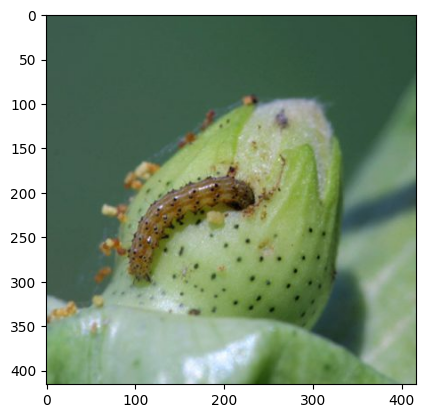

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

demo_img=Image.open("/content/20k-multi-class-crop-disease-images/Train/American Bollworm on Cotton/Image_1.jpg")
plt.imshow(demo_img)
demo_transformed_image=Test_Transforms(demo_img)
print(demo_transformed_image.shape)

# **Applying Transformation to train and test set**

In [28]:
train_data=datasets.ImageFolder(root="/content/20k-multi-class-crop-disease-images/Train",
                                transform=Train_Transforms)
test_data=datasets.ImageFolder(root="/content/20k-multi-class-crop-disease-images/Validation",
                                transform=Test_Transforms)

## **Creating Validation split**

In [29]:
import torch.utils.data as data
valid_ratio=0.2
valid_size=int(valid_ratio*len(train_data))
train_size=len(train_data)-valid_size

train_data,valid_data=data.random_split(train_data,[train_size,valid_size])

In [30]:
import copy
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = Test_Transforms

In [31]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 12359
Number of validation examples: 3089
Number of testing examples: 3171


In [32]:
BATCH_SIZE=64

train_iterator=data.DataLoader(train_data,
                               shuffle=True,
                               batch_size=BATCH_SIZE)

valid_iterator=data.DataLoader(valid_data,
                               batch_size=BATCH_SIZE)

test_iterator=data.DataLoader(test_data,
                              batch_size=BATCH_SIZE)

In [33]:
def normalize_image(image):
  image_min=image.min()
  image_max=image.max()
  image.clamp_(min=image_min,max=image_max)
  image.add_(-image_min).div_(image_max-image_min+1e-5)
  return image

In [34]:
import numpy as np
def plot_images(images,labels,classes,normalize=True):

  n_images=len(images)
  rows=int(np.sqrt(n_images))
  cols=int(np.sqrt(n_images))
  fig=plt.figure(figsize=(15,15))

  for i in range(rows*cols):
    ax=fig.add_subplot(rows,cols,i+1)
    image=images[i]
    if normalize:
      image=normalize_image(image)

    ax.imshow(image.permute(1,2,0).cpu().numpy())
    label=classes[labels[i]]
    ax.set_title(label)
    ax.axis('off')

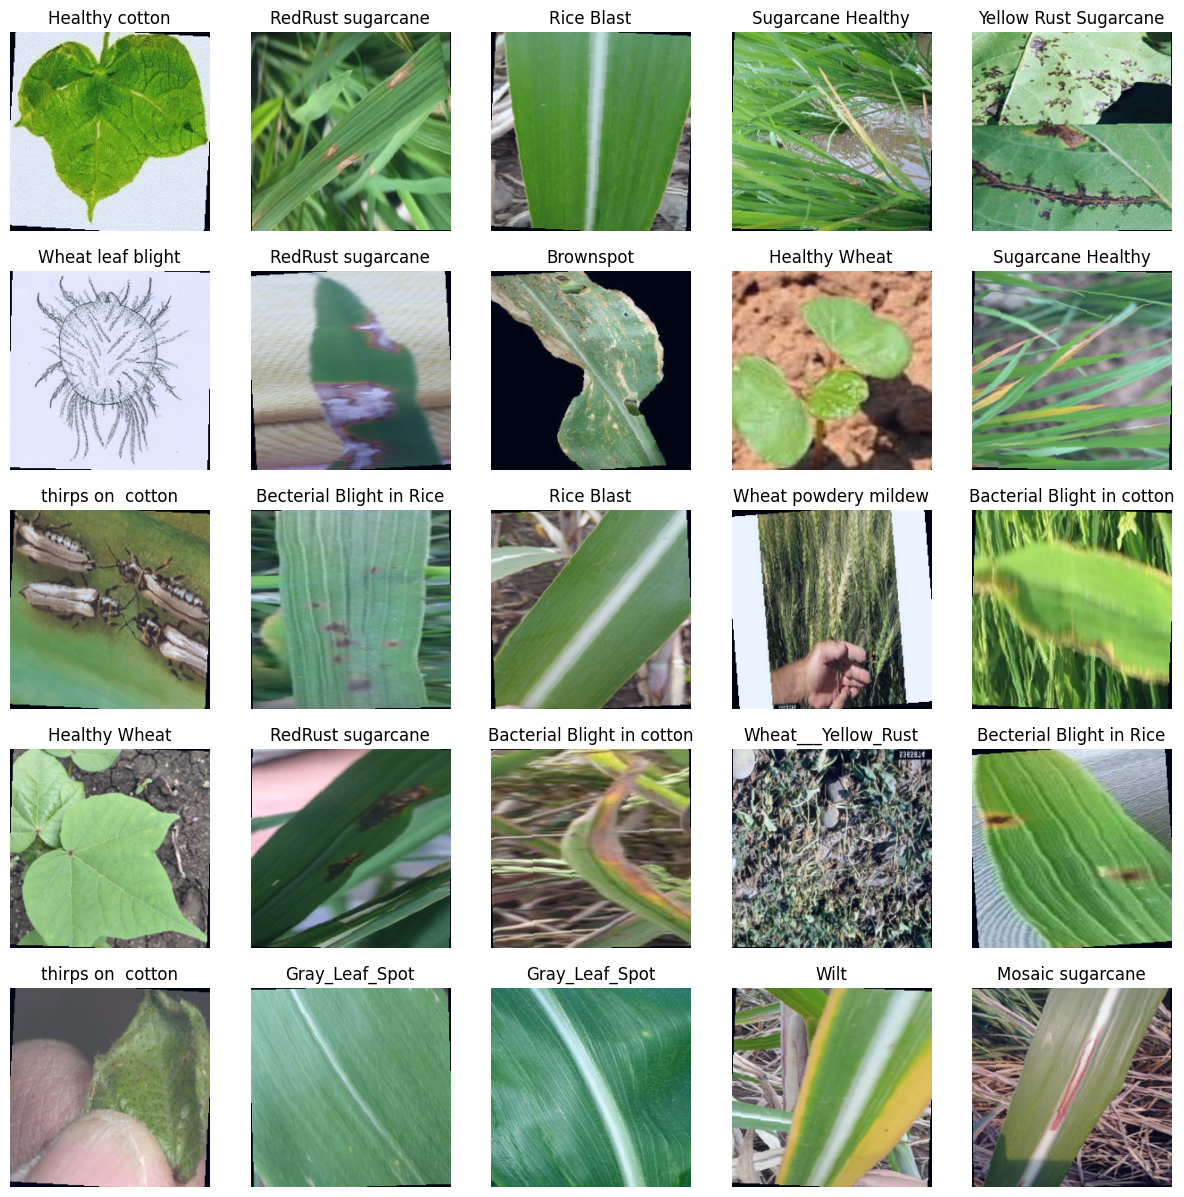

In [35]:
N_IMAGES=25

images,labels=zip(*[(image,label) for image,label in
                    [train_data[i] for i in range(N_IMAGES)]])

classes=test_data.classes

plot_images(images,labels,classes)

# Formating the labels (if needed)

In [36]:
#def format_label(label):
   # label = label.split('.')[-1]
   # label = label.replace('_', ' ')
   # label = label.title()
   # label = label.replace(' ', '')
   # return label

#test_data.classes = [format_label(c) for c in test_data.classes]

#classes = test_data.classes

#plot_images(images, labels, classes)

## Resnet Model

In [37]:
import torch
import torch.nn as nn
from torchvision import models

In [38]:
# Load a Pretrained Model (e.g., ResNet50)
image_model = models.resnet50(pretrained=True)

# Freeze the initial layers
for param in image_model.parameters():
    param.requires_grad = False

# Modify the final layer to match the number of classes
num_classes= 42
num_ftrs = image_model.fc.in_features
image_model.fc = nn.Linear(num_ftrs,num_classes )  # Replace `num_classes` with your number of classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_model = image_model.to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(image_model.fc.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 98.9MB/s]


In [39]:
# Save a checkpoint during training
def save_checkpoint(epoch, model, optimizer, loss, file_path='model_checkpoint.pth'):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, file_path)



# Load checkpoint to continue training
def load_checkpoint(file_path, model, optimizer):
    checkpoint = torch.load(file_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Resuming training from epoch {epoch+1} with loss {loss}")
    return model, optimizer, epoch



In [40]:
num_epochs = 5

for epoch in range(num_epochs):
    image_model.train()
    running_loss = 0.0

    for images, labels in train_iterator:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = image_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validate the model
    image_model.eval()
    val_loss = 0.0
    correct = 0

    with torch.no_grad():
        for images, labels in valid_iterator:
            images, labels = images.to(device), labels.to(device)
            outputs = image_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_iterator)}, Validation Loss: {val_loss/len(valid_iterator)}, Accuracy: {correct/len(valid_iterator)}')


    # Save the trained image model
torch.save(image_model, 'image_model.pth')


# Load the model from checkpoint
#image_model, optimizer, start_epoch = load_checkpoint('image_model_checkpoint.pth', image_model, optimizer)

# Continue training from the next epoch
#for epoch in range(start_epoch + 1, num_epochs):
    # Training loop here


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-2cceab478a06>", line 7, in <cell line: 3>
    for images, labels in train_iterator:
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 630, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 673, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 50, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py", line 420, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/usr/local/lib/python3.10/dist-packages/torch/u

KeyboardInterrupt: 

## Demo Prediction


In [ ]:

def predict_image(image_path, model, transform, class_names, device='cpu'):
    """
    Predict the class of an image and return the prediction and probability.

    Parameters:
    - image_path: Path to the image file.
    - model: The trained image model.
    - transform: Transformation function to preprocess the image.
    - class_names: List of class names.
    - device: Device to run the model on ('cpu' or 'cuda').

    Returns:
    - predicted_class: Predicted class name.
    - probability: Probability of the predicted class.
    """
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Preprocess the image
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Predict
    model.to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.softmax(outputs, dim=1)
        _, predicted_idx = torch.max(outputs, 1)
        predicted_class = class_names[predicted_idx.item()]
        probability = probs[0, predicted_idx.item()].item()

    return predicted_class, probability


In [ ]:
import matplotlib.pyplot as plt

def show_image_with_label(image_path, predicted_class, probability):
    """
    Display the image with its predicted label and probability.

    Parameters:
    - image_path: Path to the image file.
    - predicted_class: Predicted class name.
    - probability: Probability of the predicted class.
    """
    image = Image.open(image_path)

    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_class} (Probability: {probability:.4f})')
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ls

In [ ]:
# Check the number of output features in the final fully connected layer
num_classes = image_model.fc.out_features
print(f"Number of output classes: {num_classes}")

In [ ]:
from torchvision import datasets, transforms

# Load the dataset
dataset = datasets.ImageFolder(root='/content/20k-multi-class-crop-disease-images/Train', transform=transforms.ToTensor())

# Get class names from dataset
class_names = dataset.classes

# Print class names
for idx, class_name in enumerate(class_names):
    print(f"Class {idx}: {class_name}")

In [ ]:
# Example usage
image_path = '/content/test3.jpeg'

# Predict
predicted_class, probability = predict_image(image_path, image_model, Test_Transforms, class_names, device='cpu')

# Show the image with label
show_image_with_label(image_path, predicted_class, probability)

#**Ensemble Model**#

In [ ]:
import numpy as np

def ensemble_predict(image_model, env_model, image_data_loader, env_data, image_model_weight=0.7):
    """
    Function to perform predictions using an ensemble of image and environmental models
    with weighted averaging, where the image model prediction influences the environmental model prediction.

    Parameters:
    - image_model: The trained image model (e.g., CNN).
    - env_model: The trained environmental model (e.g., LogisticRegression).
    - image_data_loader: DataLoader for image data.
    - env_data: Environmental data for prediction.
    - image_model_weight: Weight assigned to the image model's predictions (default is 0.7).

    Returns:
    - combined_preds: Combined predictions from both models using weighted averaging.
    """

    # Ensure the weights sum up to 1
    env_model_weight = 1 - image_model_weight

    # Get predictions from the image model (CNN)
    image_model.eval()
    image_preds = []

    for images, _ in image_data_loader:
        images = images.to(device)
        with torch.no_grad():
            output = image_model(images)
            image_probs = torch.softmax(output, dim=1).cpu().numpy()
            image_preds.append(image_probs)

    image_preds = np.vstack(image_preds)  # Convert list of arrays to a single array

    # Get predictions from the environmental model for all environmental data
    env_preds = env_model.predict_proba(env_data)

    # Apply weighted averaging
    combined_preds = (image_model_weight * image_preds) + (env_model_weight * env_preds)

    return combined_preds


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# Set the image model to evaluation mode
image_model.eval()

# Assuming test data and labels are already prepared
# true_labels should be the actual labels of your test data

In [ ]:
# Run predictions using the ensemble function
combined_preds = ensemble_predict(
    image_model=image_model,
    env_model=logistic_model,
    image_data_loader=test_iterator,
    env_data=X_test,
    image_model_weight=0.7  # Adjust the weight if necessary
)

# Convert combined predictions to final class labels
final_preds = np.argmax(combined_preds, axis=1)  # Get the index of the maximum probability

In [ ]:
# Check the number of output features in the final fully connected layer
num_classes = image_model.fc.out_features
print(f"Number of output classes: {num_classes}")

In [ ]:
from torchvision import datasets, transforms

# Load the dataset
dataset = datasets.ImageFolder(root='/content/20k-multi-class-crop-disease-images/Train', transform=transforms.ToTensor())

# Get class names from dataset
class_names = dataset.classes

# Print class names
for idx, class_name in enumerate(class_names):
    print(f"Class {idx}: {class_name}")

In [ ]:
import torch
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def evaluate_model(image_model, test_data_loader, device='cpu'):
    """
    Evaluate the image model on the test dataset and compute accuracy, precision, recall, and F1-score.

    Parameters:
    - image_model: The trained image model (e.g., CNN).
    - test_data_loader: DataLoader for the test dataset.
    - device: Device to run the model on ('cpu' or 'cuda').

    Returns:
    - accuracy: Accuracy of the model on the test dataset.
    - class_report: Classification report containing precision, recall, and F1-score for each class.
    """

    image_model.to(device)
    image_model.eval()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in test_data_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = image_model(images)
            _, preds = torch.max(outputs, 1)

            # Collect predictions and labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)

    # Calculate classification report
    class_report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)

    return accuracy, class_report

evaluate_model(image_model,test_iterator)


device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Evaluate the model
accuracy, class_report = evaluate_model(image_model, test_iterator, device=device)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
for class_name, metrics in class_report.items():
    if class_name != 'accuracy':
        print(f"{class_name}: Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-Score: {metrics['f1-score']:.4f}")

# If you need a dictionary of metrics
print(class_report)

# Downloading model weights

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import torch

# Assuming `image_model` is your trained model
model_path = '/content/drive/MyDrive/model.pth'  # Path in Google Drive
torch.save(image_model.state_dict(), model_path)

In [ ]:
from google.colab import files
files.download(model_path)

In [ ]:
files.download('image_model.pth')

Code cell <Qyw4YSvq67Js>
# %% [code]


Text cell <Zh6Ip6Woh0VV>
# %% [markdown]
### Tensorflow lite


Code cell <2Of7G5l7jCRJ>
# %% [code]
from google.colab import files
uploaded = files.upload()

Code cell <pyoDHLzJh5Oq>
# %% [code]
import torch

# Load your trained PyTorch model
model = torch.load('image_model.pth', map_location=torch.device('cpu'))
model.eval()

# Dummy input for the model (match input size used during training)
dummy_input = torch.randn(1, 3, 224, 224)  # Example input shape

# Export to ONNX format
torch.onnx.export(model, dummy_input, "model.onnx", input_names=["input"], output_names=["output"], opset_version=11)

Code cell <iCO2moazjXg5>
# %% [code]
pip install onnx onnx-tf

Code cell <OdYZdhY8pE_I>
# %% [code]
!pip install onnx onnx-tf tensorflow==2.10 keras==2.10.0

Code cell <9Lf7lL5cqLW6>
# %% [code]
!pip install --upgrade tensorflow

Code cell <lVw7RX-VqTpd>
# %% [code]
!pip install onnx onnx-tf

Code cell <xZKIzNK1rBxr>
# %% [code]
!pip install --upgrade tensorflow keras

Code cell <fP65bKtivqVI>
# %% [code]
!pip uninstall protobuf -y

Code cell <DJoxkoS8vsCi>
# %% [code]
!pip install protobuf==3.20.1

Code cell <Q5gjgQ6fwBJx>
# %% [code]
!pip install google-auth-oauthlib>=0.7.0
!pip install onnx onnx-tf

Code cell <rPCbdaFsuaAF>
# %% [code]
pip install --upgrade pip

Code cell <a6Mm_J7dwWF2>
# %% [code]
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing import image


Code cell <qAdNJ7tfx9eJ>
# %% [code]
import onnx
from onnx_tf.backend import prepare

Code cell <48hnUORniSd4>
# %% [code]
import onnx
from onnx_tf.backend import prepare

Code cell <k9o8PMs5toP5>
# %% [code]
# Load the ONNX model
onnx_model = onnx.load("model.onnx")

# Convert ONNX to TensorFlow
tf_rep = prepare(onnx_model)

# Export the model to TensorFlow SavedModel format
tf_rep.export_graph("model_tf")

Code cell <CvgDF7OlxeBu>
# %% [code]


# Trying vision Transformer Model

In [41]:
pip install torch torchvision timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.6 MB/s eta 0:00:00


In [42]:
import torch
from torchvision import transforms
from PIL import Image
import timm  # PyTorch Image Models library

In [43]:
# Load a pre-trained Vision Transformer model
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [44]:
ls

20k-multi-class-crop-disease-images/  plant_disease_weather_conditions.csv  sample_data/


In [45]:
from google.colab import files
uploaded = files.upload()

Saving test1.jpeg to test1.jpeg


In [46]:
pwd

'/content'

In [47]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize based on ImageNet statistics
])

# Load and preprocess the image
image_path = '/content/test1.jpeg'
image = Image.open(image_path).convert('RGB')
image = transform(image).unsqueeze(0)  # Add a batch dimension

In [48]:
# Make a prediction
with torch.no_grad():
    output = model(image)

# Get the predicted class
_, predicted_class = torch.max(output, 1)
print(f"Predicted class: {predicted_class.item()}")

Predicted class: 998


In [ ]:
# Modify the final layer to match the number of classes in your dataset
model.head = torch.nn.Linear(model.head.in_features, num_classes)

# Define a loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop (simplified example)
for epoch in range(5):
    model.train()
    for images, labels in train_iterator:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_iterator:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')
